# visualize data analyst jobs

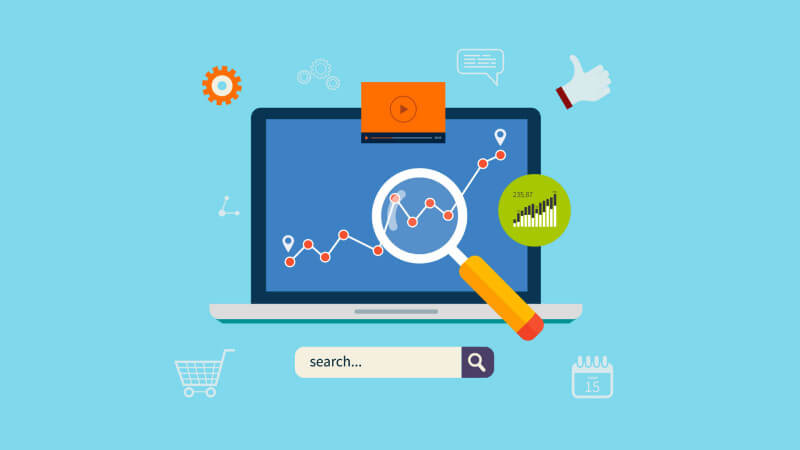

# Import Libraries and dataset

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
from wordcloud import WordCloud
import pandas_profiling as pp
import warnings
import os

warnings.filterwarnings('ignore')
%matplotlib inline


print(os.listdir("../input"))


In [ ]:
data=pd.read_csv('../input/data-analyst-jobs/DataAnalyst.csv')

# Lets explore the data

In [ ]:
data.head(2)

In [ ]:
data.info

In [ ]:
data.describe()

In [ ]:
pp.ProfileReport(data)

# Data cleaning

# Remove the unnamed column

In [ ]:
data.drop(['Unnamed: 0'], axis=1,inplace=True)

check for missing values

In [ ]:
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [ ]:
data.isnull().sum()

In [ ]:
data['Easy Apply'].value_counts()

In [ ]:
data['Competitors'].value_counts()

In [ ]:
data['Rating'].value_counts()[:5]

As some of the columns contains -1 or '-1.0' or '-1' etc . We need to clean this(This is kind of null values)

Replace -1 or -1.0 or '-1' to NaN

In [ ]:
data=data.replace(-1,np.nan)
data=data.replace(-1.0,np.nan)
data=data.replace('-1',np.nan)

In [ ]:
missing_values_table(data)

Now you can see there are lots of missing values in the dataset. 'Easy Apply' and 'Competitors' has maximum number of missing values (> 50%)

Most companies has null values in easy apply because they are not hiring .



# Current openings

In [ ]:
data['Easy Apply']=data['Easy Apply'].fillna(False).astype('bool')

In [ ]:
df_easy_apply=data[data['Easy Apply']==True]
df=df_easy_apply.groupby('Company Name')['Easy Apply'].count().reset_index()
company_opening_df=df.sort_values('Easy Apply',ascending=False).head(10)

In [ ]:
plt.figure(figsize=(10,5))
chart = sns.barplot(
    data=company_opening_df,
    x='Company Name',
    y='Easy Apply',
    palette='Set1'
)
chart=chart.set_xticklabels(
    chart.get_xticklabels(), 
    rotation=65, 
    horizontalalignment='right',
    fontweight='light',
 

)

These are the top 10 companies hiring for Data analyst roles

# Size of Employees Vs No of Companies


In [ ]:
df=data['Size'].value_counts()

In [ ]:
df=pd.DataFrame(df)
df['employee_size']=df.index

In [ ]:
df.reset_index(inplace=True)
df.drop(['index'],axis=1,inplace=True)

In [ ]:
df=df.rename(columns={"Size": "No_of_companies"})

In [ ]:
plt.figure(figsize=(10,5))
chart = sns.barplot(
    data=df,
    x='employee_size',
    y='No_of_companies',
    palette='Set1'
)
chart=chart.set_xticklabels(
    chart.get_xticklabels(), 
    rotation=65, 
    horizontalalignment='right',
    fontweight='light',
 
)

# Word Cloud of job Title

In [ ]:
job_title=data['Job Title'][~pd.isnull(data['Job Title'])]
wordCloud = WordCloud(width=450,height= 300).generate(' '.join(job_title))
plt.figure(figsize=(19,9))
plt.axis('off')
plt.title(data['Job Title'].name,fontsize=20)
plt.imshow(wordCloud)
plt.show()

# Ratings

In [ ]:
count=data.groupby('Rating')['Company Name'].count()

In [ ]:
df=pd.DataFrame(count).rename(columns={'Company Name': 'Count'}).reset_index()

In [ ]:
df=df.sort_values('Rating',ascending=False).head(20)

In [ ]:
plt.figure(figsize=(10,5))
chart = sns.barplot(
    data=df,
    x='Rating',
    y='Count',
    palette='Set1'
)
chart.set_xticklabels(
    chart.get_xticklabels(), 
    rotation=65, 
    horizontalalignment='right',
    fontweight='light',
 
)
chart.axes.yaxis.label.set_text("No. of companies")